Accuracy of Decision Tree on winequality-red: 0.7375
Accuracy of Decision Tree on winequality-white: 0.7170068027210884


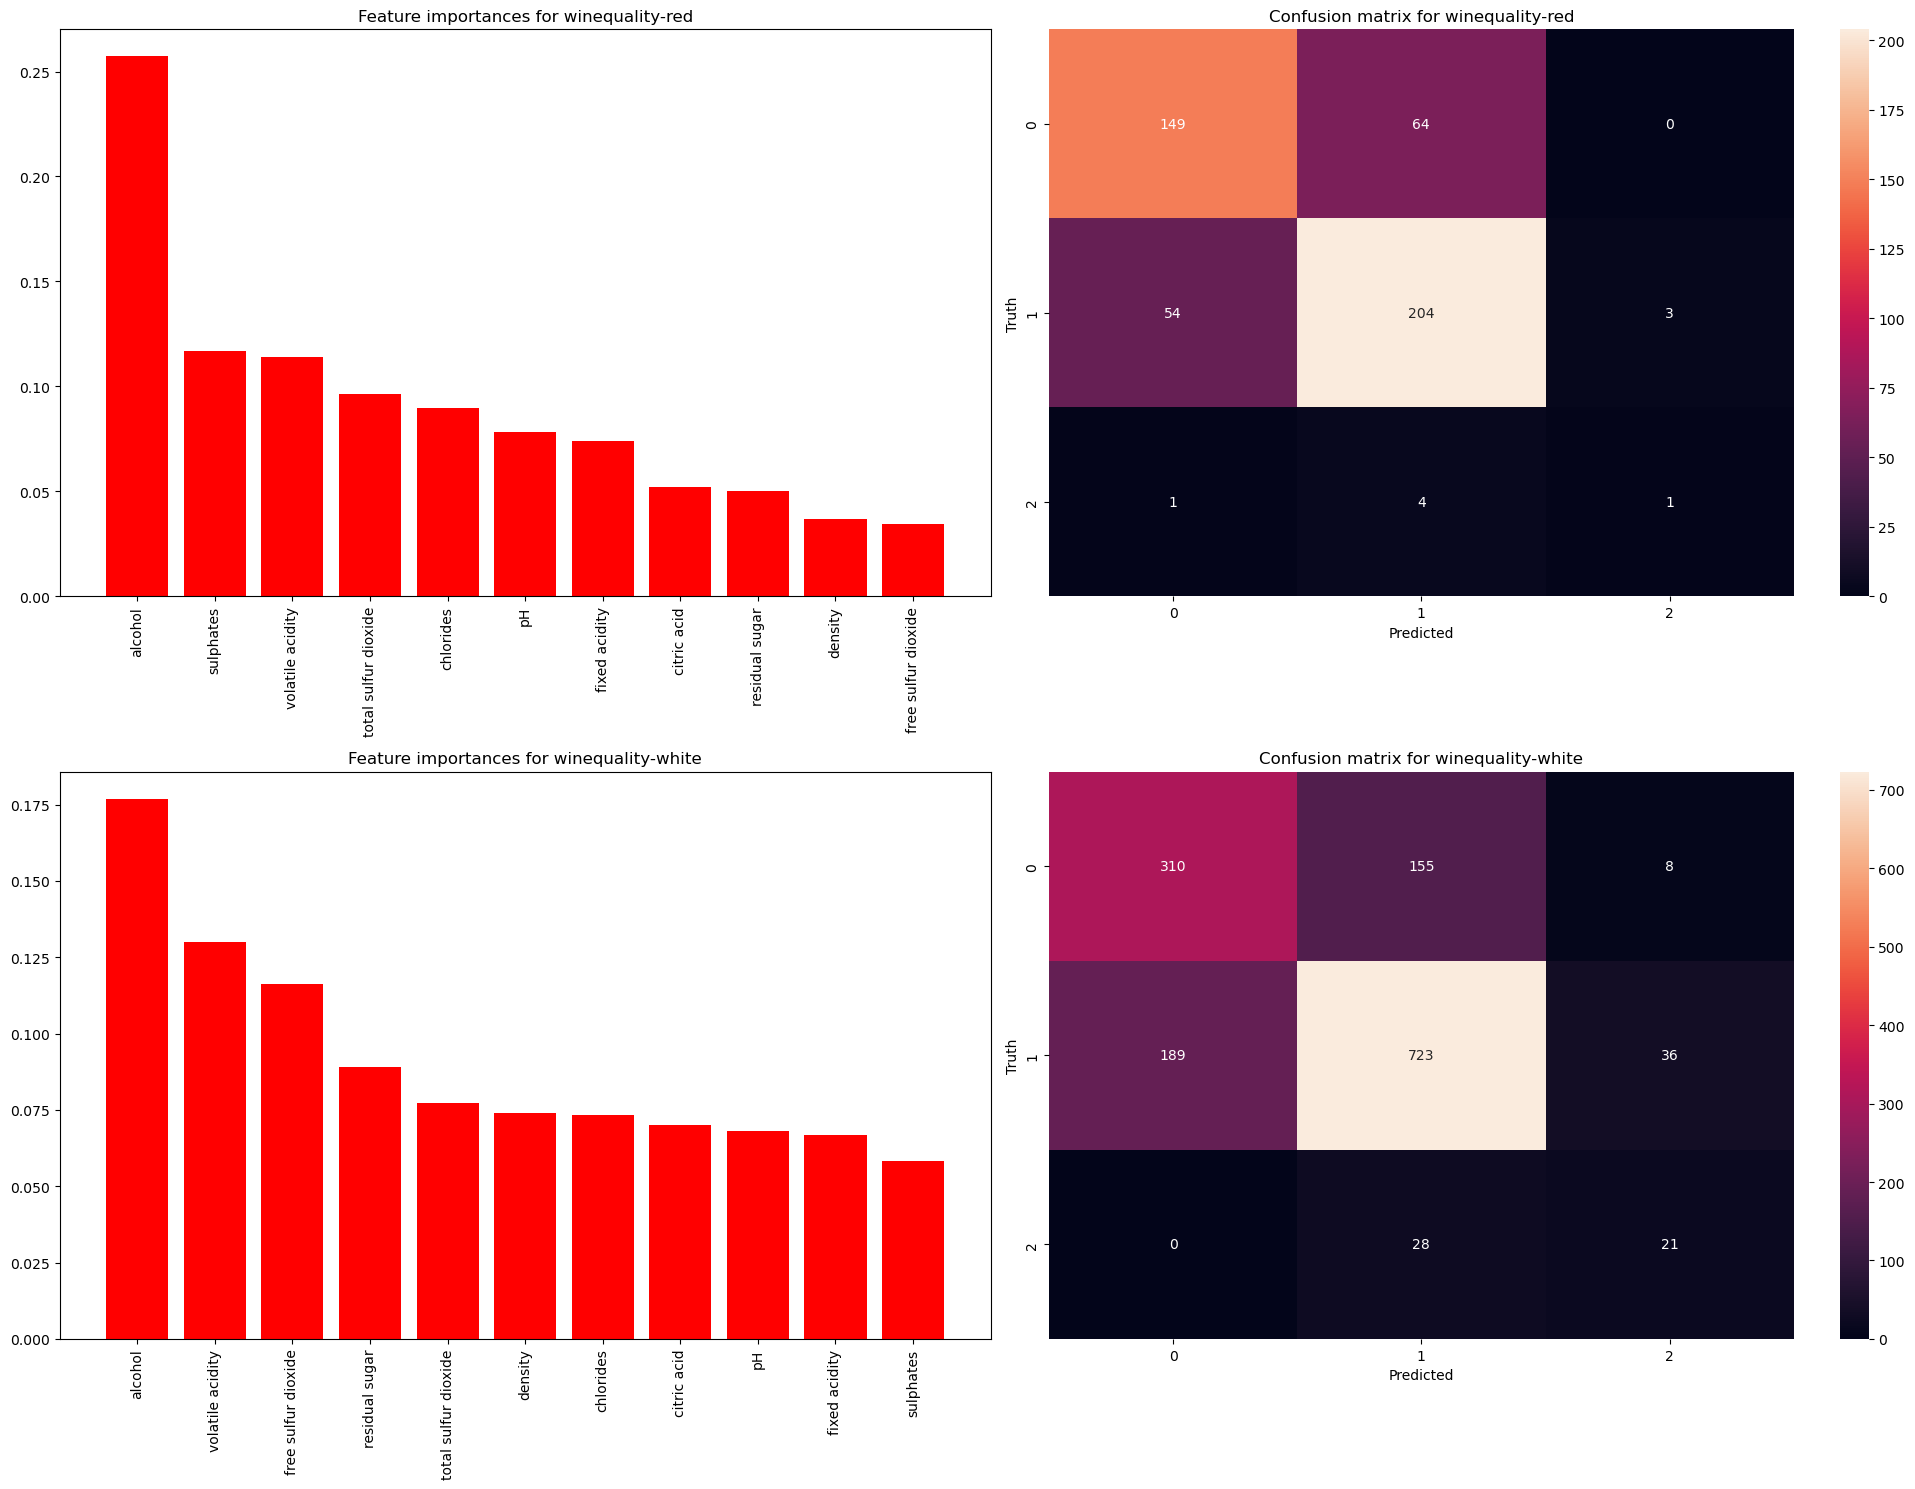

In [65]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree

import DataHandler as dh
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


datasets = dh.read_data("data/full")

fig, axs = plt.subplots(len(datasets), 2, figsize=(20, 15))

for i, (dataset_name, df) in enumerate(datasets.items()):
    X = df.iloc[:, :-1]
    
    y = df.iloc[:, -1]
    bins = [0, 5, 7, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of Decision Tree on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    axs[i, 0].bar(range(X.shape[1]), importances[indices], color="r", align="center")
    axs[i, 0].set_xticks(range(X.shape[1]))
    axs[i, 0].set_xticklabels(X.columns[indices], rotation='vertical')
    axs[i, 0].set_xlim([-1, X.shape[1]])
    axs[i, 0].set_title(f"Feature importances for {dataset_name}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i, 1])
    axs[i, 1].set_xlabel('Predicted')
    axs[i, 1].set_ylabel('Truth')
    axs[i, 1].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()

The accuracy is high. The classifier is really good at predicting the quality of the wine. 

We can also see that importance of the features in the model. The most important feature is alcohol, followed by sulphates and volatile acidity for Red Wine. The least important feature is free sulfur dioxide.

In the case of White Wine, the most important feature is alcohol, followed by Volatile acidity and Free sulfur dioxide. The least important feature is sulphates.

The confusion matrix shows that the classifier classified most of the wine correctly. However we clearly can se here (as well as in visualization of the data) that the biggest group is the for quality from 5 to 7. The same groups is also the biggest in terms of quantity in the datasets.  

Accuracy of Decision Tree on winequality-red: 0.7458333333333333
Accuracy of Decision Tree on winequality-white: 0.7163265306122449


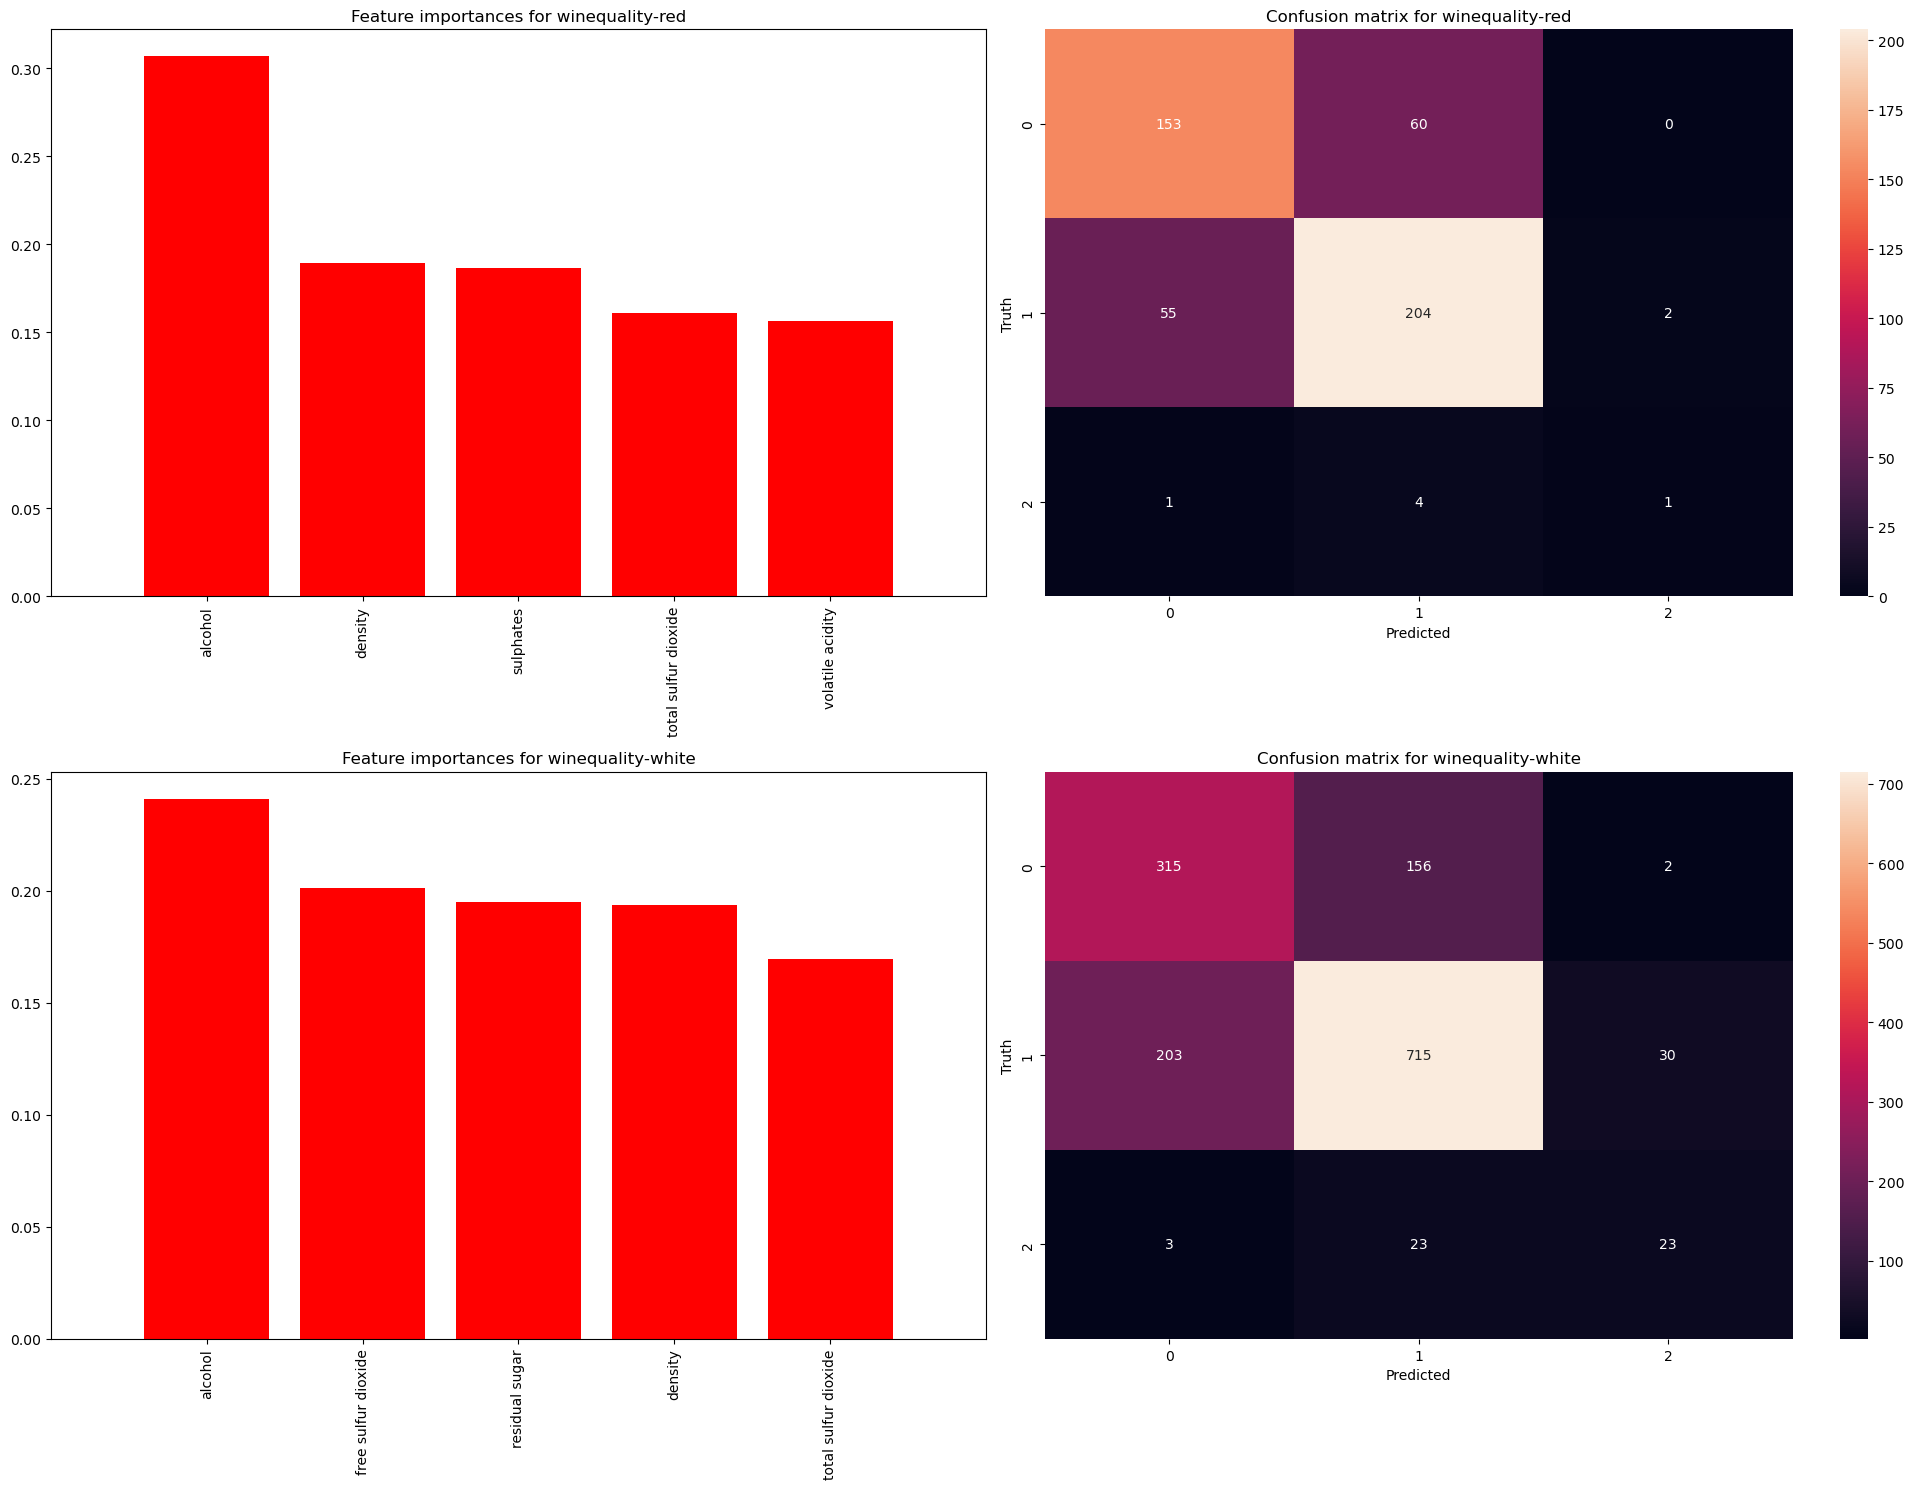

In [66]:
fig, axs = plt.subplots(len(datasets), 2, figsize=(20, 15))

for i, (dataset_name, df) in enumerate(datasets.items()):
    if dataset_name == "winequality-red":
        selected_columns = ['alcohol', 'density', 'sulphates', 'total sulfur dioxide', 'volatile acidity']
    elif dataset_name == "winequality-white":
        selected_columns = ['alcohol', 'density', 'free sulfur dioxide', 'residual sugar' ,'total sulfur dioxide']
    X = df[selected_columns]

    y = df.iloc[:, -1]
    bins = [0, 5, 7, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of Decision Tree on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    axs[i, 0].bar(range(X.shape[1]), importances[indices], color="r", align="center")
    axs[i, 0].set_xticks(range(X.shape[1]))
    axs[i, 0].set_xticklabels(X.columns[indices], rotation='vertical')
    axs[i, 0].set_xlim([-1, X.shape[1]])
    axs[i, 0].set_title(f"Feature importances for {dataset_name}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i, 1])
    axs[i, 1].set_xlabel('Predicted')
    axs[i, 1].set_ylabel('Truth')
    axs[i, 1].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()
plt.show()